In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf

from keras.layers import Input, Embedding, Flatten, Dropout, Dense, Concatenate
from keras.models import Model

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('drive/MyDrive/CZ4032 Project 2/Reference/input/ratings.csv')
movies = pd.read_csv('drive/MyDrive/CZ4032 Project 2/Reference/input/movies.csv')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
total_user = len(dataset.userId.unique())
total_movie = len(dataset.movieId.unique())

In [ ]:
def create_model(embedding_size , nhid):
  movie_input = Input(shape=[1])
  movie_embedding = Embedding(total_movie+1, embedding_size , name = 'movie_embedding')(movie_input)
  movie_vec = Flatten()(movie_embedding)

  user_input = Input(shape=[1])
  user_embedding = Embedding(total_user+1, embedding_size)(user_input)
  user_vec = Flatten()(user_embedding)


  conc = Concatenate()([movie_vec, user_vec])


  fc1 = Dense(nhid, activation='relu')(conc)
  fc1 = Dropout(0.25) (fc1)
  #fc2 = Dense(32, activation='relu')(fc1)
  out = Dense(1)(fc1)
  model = Model([user_input, movie_input], out)
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [ ]:
epochs = 20
batch_size = 128

In [ ]:
#model = create_model(best_params['embedding_size'], best_params['nhid'])
model = create_model(50,128)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 movie_embedding (Embedding)    (None, 1, 50)        486250      ['input_5[0][0]']                
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 50)        30550       ['input_6[0][0]']                
                                                                                            

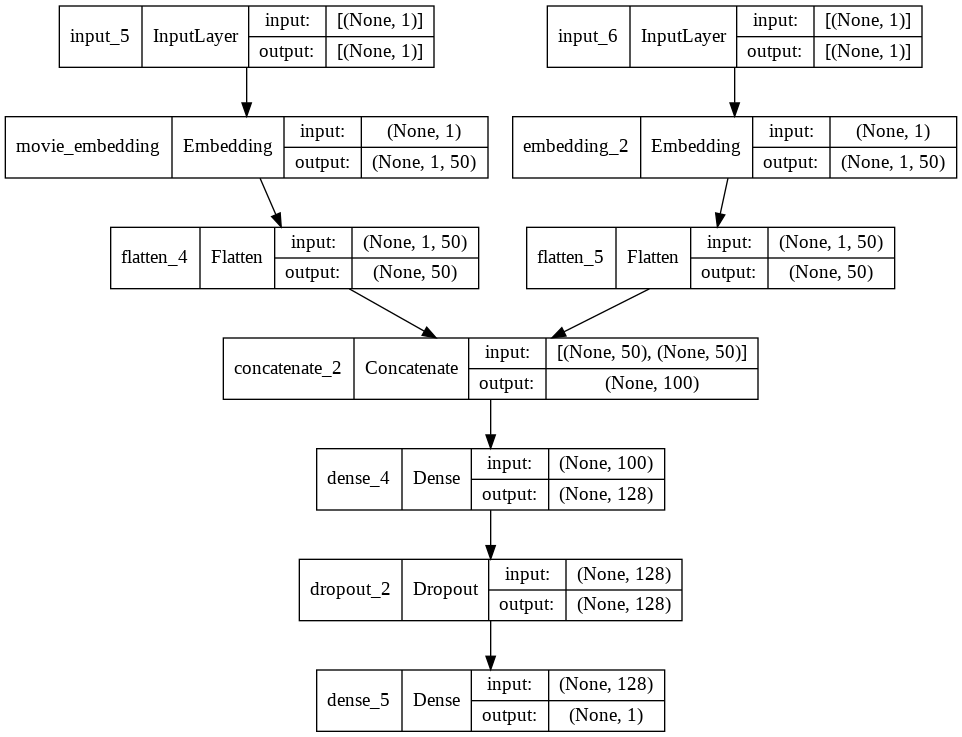

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

Epoch 1/20
631/631 [==============================] - 4s 6ms/step - loss: 1.8390 - val_loss: 0.8350
Epoch 2/20
631/631 [==============================] - 3s 5ms/step - loss: 0.8424 - val_loss: 0.8128
Epoch 3/20
631/631 [==============================] - 4s 6ms/step - loss: 0.8116 - val_loss: 0.8008
Epoch 4/20
631/631 [==============================] - 3s 5ms/step - loss: 0.7927 - val_loss: 0.7855
Epoch 5/20
631/631 [==============================] - 3s 5ms/step - loss: 0.7697 - val_loss: 0.7838
Epoch 6/20
631/631 [==============================] - 3s 5ms/step - loss: 0.7564 - val_loss: 0.7750
Epoch 7/20
631/631 [==============================] - 3s 5ms/step - loss: 0.7415 - val_loss: 0.7797
Epoch 8/20
631/631 [==============================] - 3s 5ms/step - loss: 0.7258 - val_loss: 0.7768
Epoch 9/20
631/631 [==============================] - 3s 5ms/step - loss: 0.7130 - val_loss: 0.7743
Epoch 10/20
631/631 [==============================] - 4s 6ms/step - loss: 0.7025 - val_loss: 0.7824

Text(0, 0.5, 'Training Error')

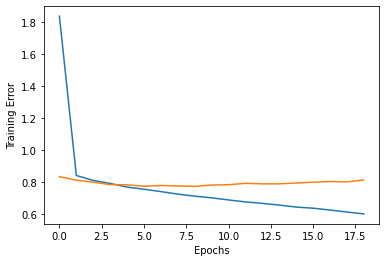

In [ ]:
history = model.fit([train.userId, train.movieId], train.rating, batch_size = batch_size , epochs  = epochs , 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10 , restore_best_weights = True)],
                    validation_data=([test.userId , test.movieId], test.rating))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [ ]:
movie_data = np.array(list(set(dataset.movieId)))

In [ ]:
movie_data

array([    1,     2,     3, ..., 32743, 65514, 98296])

In [ ]:
user_id = 1
user = np.array([1] * len(movie_data))

In [ ]:
pred_ = model.predict([user, movie_data])

pred_ = np.array([a[0] for a in pred_])
predictions = [];
for i in range(len(pred_)):
  predictions.append((pred_[i] , movie_data[i]))

predictions.sort(reverse = True)
recommended_movie_ids = [a[1] for a in predictions[:5]]
recommended_movie_ids

[2360, 4789, 7767, 5833, 3086]

In [ ]:
movies[movies['movieId'].isin(recommended_movie_ids)]

,movieId,title,genres
1762,2360,"Celebration, The (Festen) (1998)",Drama
2329,3086,Babes in Toyland (1934),Children|Comedy|Fantasy|Musical
3505,4789,Phantom of the Paradise (1974),Comedy|Fantasy|Horror|Musical|Thriller
4083,5833,Dog Soldiers (2002),Action|Horror
5013,7767,"Best of Youth, The (La meglio gioventù) (2003)",Drama
